In [42]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [43]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [44]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [45]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [46]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

652

In [47]:
import requests
# Import the API key.
from config import weather_api_key

In [48]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [49]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [50]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | ancud
Processing Record 5 of Set 1 | praia
Processing Record 6 of Set 1 | luderitz
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | khed brahma
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | lyubech
Processing Record 16 of Set 1 | kavieng
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | oulainen
Processing Record 19 of Set 1 | mehamn
Processing Record 20 of Set 1 | kalmunai
Processing Record 21 of Set 1 | batsfjord
Processing Record 22 of Set 1 | dikson
Processing Record 23 of Set 1 |

Processing Record 41 of Set 4 | bemidji
Processing Record 42 of Set 4 | yumen
Processing Record 43 of Set 4 | penzance
Processing Record 44 of Set 4 | progreso
Processing Record 45 of Set 4 | longyearbyen
Processing Record 46 of Set 4 | okha
Processing Record 47 of Set 4 | beringovskiy
Processing Record 48 of Set 4 | bonavista
Processing Record 49 of Set 4 | maarianhamina
Processing Record 50 of Set 4 | tasiilaq
Processing Record 1 of Set 5 | atuona
Processing Record 2 of Set 5 | toliary
City not found. Skipping...
Processing Record 3 of Set 5 | virginia beach
Processing Record 4 of Set 5 | salalah
Processing Record 5 of Set 5 | naze
Processing Record 6 of Set 5 | omsukchan
Processing Record 7 of Set 5 | ambon
Processing Record 8 of Set 5 | lisakovsk
Processing Record 9 of Set 5 | oistins
Processing Record 10 of Set 5 | qom
Processing Record 11 of Set 5 | maibong
Processing Record 12 of Set 5 | inhambane
Processing Record 13 of Set 5 | jalu
Processing Record 14 of Set 5 | clyde river
P

Processing Record 33 of Set 8 | cubuk
Processing Record 34 of Set 8 | mazagao
Processing Record 35 of Set 8 | sorland
Processing Record 36 of Set 8 | shimoda
Processing Record 37 of Set 8 | cannes
Processing Record 38 of Set 8 | assare
Processing Record 39 of Set 8 | saint-francois
Processing Record 40 of Set 8 | talnakh
Processing Record 41 of Set 8 | humaita
Processing Record 42 of Set 8 | kloulklubed
Processing Record 43 of Set 8 | mercedes
Processing Record 44 of Set 8 | las vegas
Processing Record 45 of Set 8 | san cristobal
Processing Record 46 of Set 8 | ipora
Processing Record 47 of Set 8 | batagay
Processing Record 48 of Set 8 | mareeba
Processing Record 49 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 50 of Set 8 | hithadhoo
Processing Record 1 of Set 9 | west wendover
Processing Record 2 of Set 9 | nosy varika
Processing Record 3 of Set 9 | san patricio
Processing Record 4 of Set 9 | saint anthony
Processing Record 5 of Set 9 | ust-tsilma
Processing R

Processing Record 21 of Set 12 | clarence town
Processing Record 22 of Set 12 | walvis bay
Processing Record 23 of Set 12 | tura
Processing Record 24 of Set 12 | goderich
Processing Record 25 of Set 12 | la macarena
Processing Record 26 of Set 12 | olinda
Processing Record 27 of Set 12 | ponot
Processing Record 28 of Set 12 | takoradi
Processing Record 29 of Set 12 | los llanos de aridane
Processing Record 30 of Set 12 | otane
Processing Record 31 of Set 12 | divo
Processing Record 32 of Set 12 | yarovoye
Processing Record 33 of Set 12 | neuquen
Processing Record 34 of Set 12 | petrolina
Processing Record 35 of Set 12 | isabela
Processing Record 36 of Set 12 | siloam springs
Processing Record 37 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 38 of Set 12 | phan rang
City not found. Skipping...
Processing Record 39 of Set 12 | naldurg
Processing Record 40 of Set 12 | vawkavysk
Processing Record 41 of Set 12 | guadalupe y calvo
Processing Record 42 of Set 12 | komsom

In [51]:
len(city_data)

609

In [52]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,-9.22,91,91,7.47,GL,2022-01-30 06:45:37
1,Avarua,-21.2078,-159.7750,78.85,83,100,5.75,CK,2022-01-30 06:45:37
2,Busselton,-33.6500,115.3333,90.09,40,0,18.57,AU,2022-01-30 06:45:37
3,Ancud,-41.8697,-73.8203,53.13,82,29,10.42,CL,2022-01-30 06:45:38
4,Praia,14.9215,-23.5087,68.54,68,75,14.97,CV,2022-01-30 06:45:38


In [53]:
#reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed.
new_columns=['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed']
city_df=city_data_df[new_columns] 
city_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2022-01-30 06:45:37,77.4840,-69.3632,-9.22,91,91,7.47
1,Avarua,CK,2022-01-30 06:45:37,-21.2078,-159.7750,78.85,83,100,5.75
2,Busselton,AU,2022-01-30 06:45:37,-33.6500,115.3333,90.09,40,0,18.57
3,Ancud,CL,2022-01-30 06:45:38,-41.8697,-73.8203,53.13,82,29,10.42
4,Praia,CV,2022-01-30 06:45:38,14.9215,-23.5087,68.54,68,75,14.97


In [54]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_df.to_csv(output_data_file, index_label="City_ID")

In [55]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_df["Lat"]
max_temps = city_df["Max Temp"]
humidity = city_df["Humidity"]
cloudiness = city_df["Cloudiness"]
wind_speed = city_df["Wind Speed"]

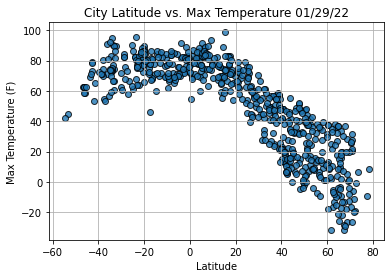

In [56]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

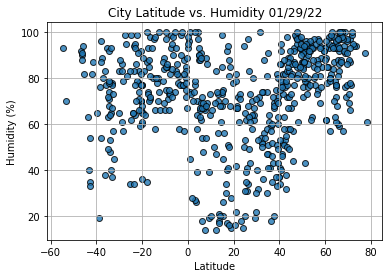

In [57]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
#plt.show()

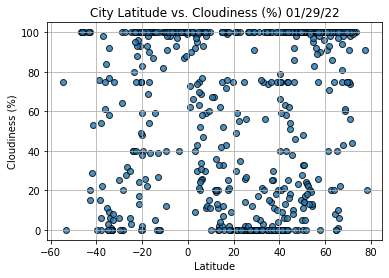

In [58]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
#plt.show()

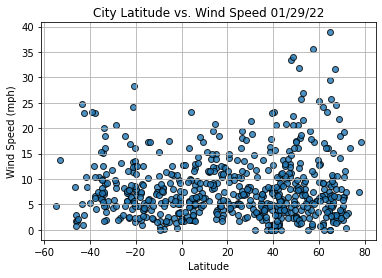

In [59]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
#plt.show()

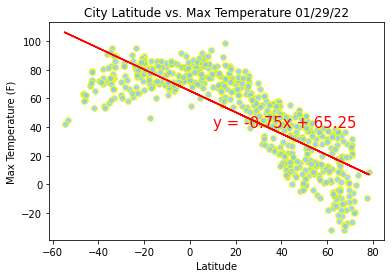

In [60]:
# Import linregress
from scipy.stats import linregress
import matplotlib.pyplot as plt

#perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept
    
#Create a scatter plot and plot the regression line.
plt.scatter(lats,max_temps,color='skyblue',edgecolor='yellow',alpha=0.8)
plt.plot(lats,regress_values,"r")

# Annotate the text for the line equation.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title('City Latitude vs. Max Temperature '+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

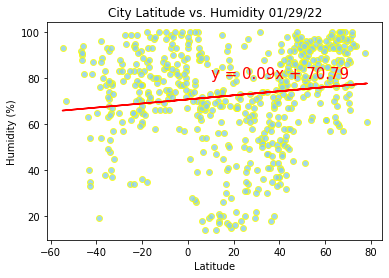

In [61]:
#plot humidity, cloudiness and wind_speed linreg.
#perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(lats, humidity)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = lats * slope + intercept
    
#Create a scatter plot and plot the regression line.
plt.scatter(lats,humidity,color='skyblue',edgecolor='yellow',alpha=0.8)
plt.plot(lats,regress_values,"r")

# Annotate the text for the line equation.
plt.annotate(line_eq, (10,80), fontsize=15, color="red")
plt.title('City Latitude vs. Humidity '+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

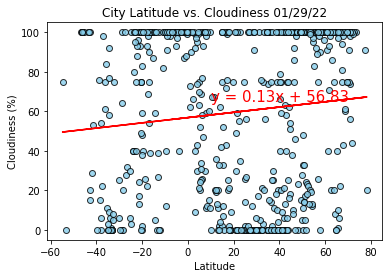

In [68]:
(slope, intercept, r_value, p_value, std_err) = linregress(lats, cloudiness)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = lats * slope + intercept
    
#Create a scatter plot and plot the regression line.
plt.scatter(lats,cloudiness,color='skyblue',edgecolor='k',alpha=0.8)
plt.plot(lats,regress_values,"r")

# Annotate the text for the line equation.
plt.annotate(line_eq, (10,65), fontsize=15, color="red")
plt.title('City Latitude vs. Cloudiness '+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

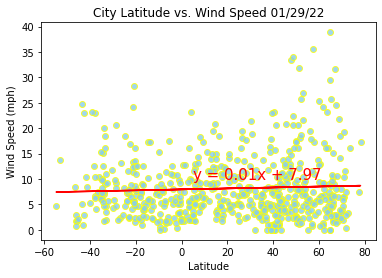

In [63]:
(slope, intercept, r_value, p_value, std_err) = linregress(lats, wind_speed)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = lats * slope + intercept
    
#Create a scatter plot and plot the regression line.
plt.scatter(lats,wind_speed,color='skyblue',edgecolor='yellow',alpha=0.8)
plt.plot(lats,regress_values,"r")

# Annotate the text for the line equation.
plt.annotate(line_eq, (5,10), fontsize=15, color="red")
plt.title('City Latitude vs. Wind Speed '+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

In [69]:
#get index13 from df.
index13=city_df.loc[13]
index13

City                      Lyubech
Country                        UA
Date          2022-01-30 06:45:41
Lat                       51.7026
Lng                       30.6569
Max Temp                    30.06
Humidity                       96
Cloudiness                    100
Wind Speed                  18.12
Name: 13, dtype: object